In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("zoo.csv")

In [3]:
duplicates = dataset.duplicated(['animal_name']).sum()
duplicates = dataset.animal_name.value_counts()
frog = dataset.loc[dataset["animal_name"]=="frog"]
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-3-0e18c042d2ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


In [4]:
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [5]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("Test Accurary : ",nb.score(X_test,y_test))
print("Train Accurary : ",nb.score(X_train,y_train))

Test Accurary :  0.9803921568627451
Train Accurary :  1.0


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
cm_nb = confusion_matrix(y_test,y_pred_nb)
cr_nb = classification_report(y_test,y_pred_nb)
print("confusion matrix : \n",cm_nb)
print("classification report : \n",cr_nb)

confusion matrix : 
 [[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.98        51
   macro avg       0.98      0.93      0.94        51
weighted avg       0.98      0.98      0.98        51



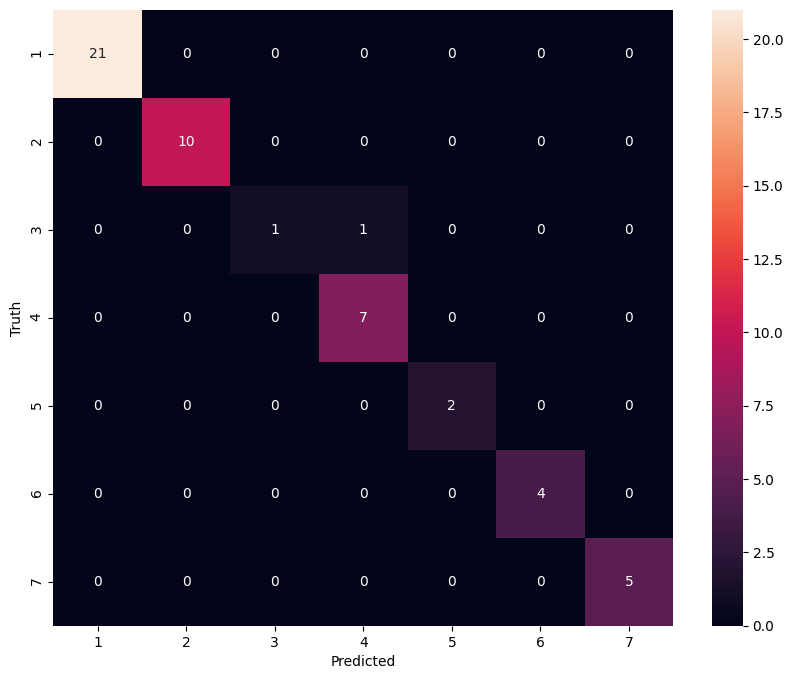

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(cm_nb,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()